This is dataset of SUV cars.

The dataset contains following info;


1.   User ID - Contains the user id of buyers
2.   Gender -   male or female
3.   Age - Age of buyers
4.   EstimatedSalary - Salary of buyers
5.   Purchased - wheather buyer purchased car or not





Now performing machine learning algorithm for classification of data

### Importing Liabraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading Dataset

In [ ]:
data = pd.read_csv('/content/suv_data.csv')

In [ ]:
data 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Exploring Data 

In [ ]:
data.shape

(400, 5)

In [ ]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
data.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
136,15668504,Female,20,82000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### Viusalizing Data



In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd525c8b50>,
      dtype=object)

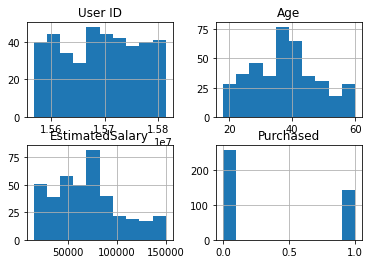

In [ ]:
data.hist()

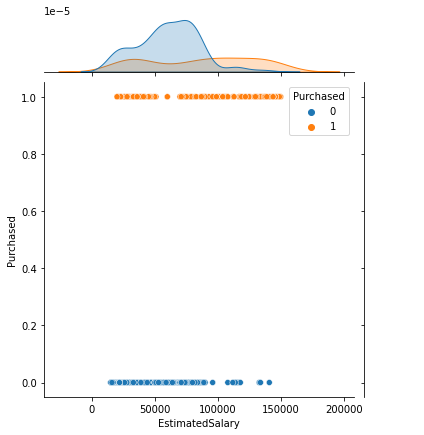

In [ ]:
sns.jointplot(x='EstimatedSalary',y='Purchased',hue='Purchased',data=data)

According to this plot we came to know that the person with Estimated Salary of 40k-70k have not purchased the SUV and people with Estimated Salary of 75k-140k have purchased the suv 

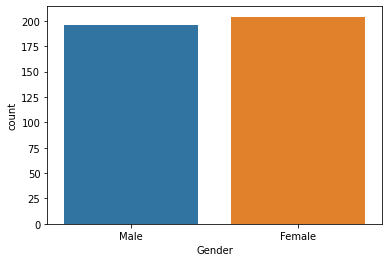

In [ ]:
sns.countplot(x='Gender',data=data)

As we can see from above countplot this data contains more number of Female than male

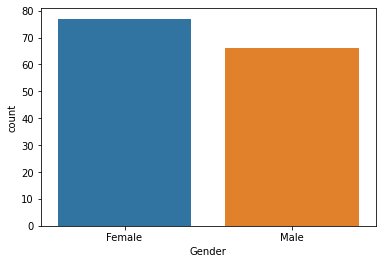

In [ ]:
sns.countplot(x='Gender',data=data[data['Purchased']==1])

female customer purchased car more than male

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


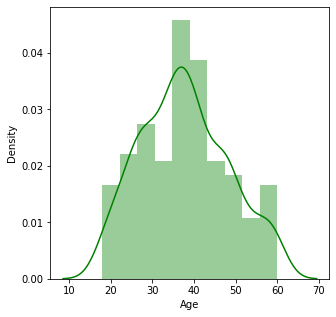

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data['Age'],color='green')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


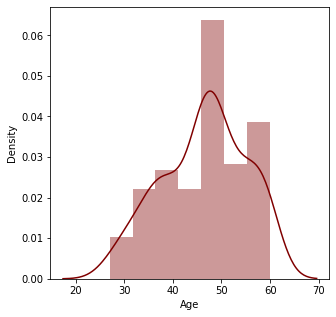

In [ ]:
plt.figure(figsize = (5,5))
sns.distplot(data[data['Purchased']==1]['Age'],color='maroon')

number customers who purchased cars are in between age range of 45-55

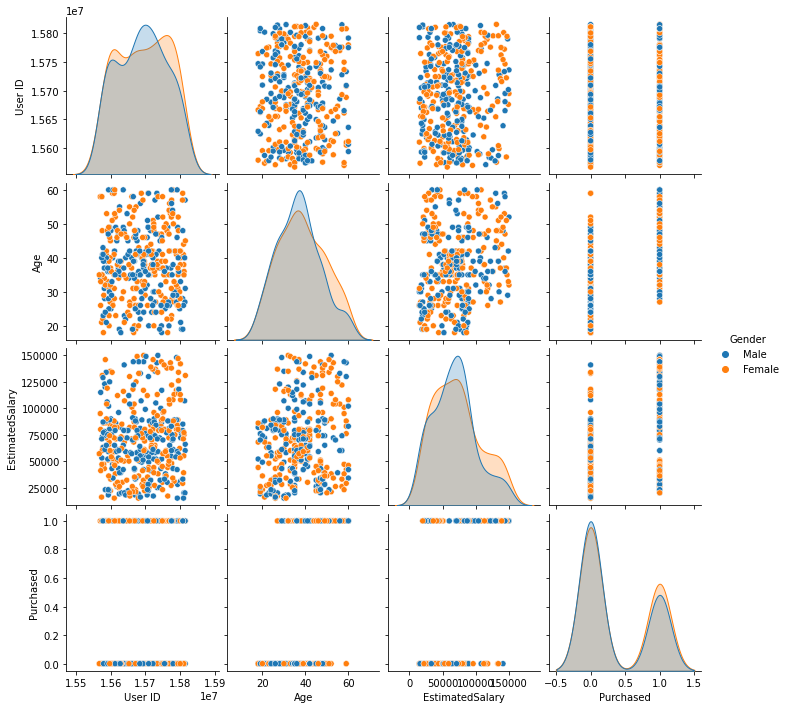

In [ ]:
sns.pairplot(data=data,hue='Gender')

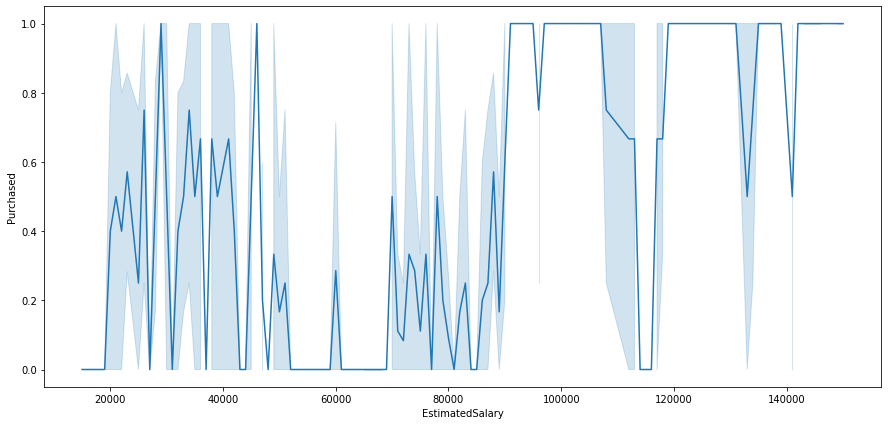

In [ ]:
plt.figure(figsize = (15,7))
sns.lineplot(x=data['EstimatedSalary'],y=data['Purchased'])

customers having age 18-26 have not purchased car

In [ ]:
data['EstimatedSalary'].max()

150000

In [ ]:
data['EstimatedSalary'].min()

15000

In [ ]:
data[data['Purchased']==1]['EstimatedSalary'].max()

150000

In [ ]:
data[data['Purchased']==1]['EstimatedSalary'].min()

20000

### Lable Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Gender"] = le.fit_transform(data['Gender'])

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


### Creating Model

In [ ]:
x = data.drop(['Purchased'],axis=1).values
y = data['Purchased'].values

### Spliting the data into traing and testing

In [ ]:
from sklearn.model_selection import train_test_split 
from pandas.core.common import random_state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred = lr.predict(x_test)

In [ ]:
pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

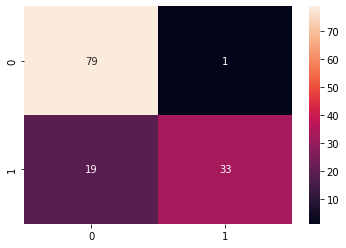

In [ ]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.8484848484848485

### The model is 84.84 % accurate 

## Conclusion

### According to this model the following interpretation we came to know that is 



*   According to this plot we came to know that the person with Estimated Salary of 40k-70k have not purchased the SUV and people with Estimated Salary of 75k-140k have purchased the suv

*   Female customer purchased car more than male

*   Customers having age 18-26 have not purchased car

*   Number customers who purchased cars are in between age range of 45-55


